# KNN 다중분류
- iris data에서 다중분류

## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-v0_8-pastel')
import seaborn as sns

SEED = 42

## 1. 데이터 준비

In [2]:
#!wget https://raw.githubusercontent.com/devdio/flyai_datasets/main/iris.csv

In [3]:
iris = pd.read_csv('/content/iris.csv')
iris.head(5)

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris.columns = [col.lower().replace(' ','_') for col in iris.columns]
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [6]:
df = iris.copy()
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


### 범주형 변수

In [7]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

### 연속형 변수

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


### 결측치 확인

In [9]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### 중복치 확인

In [10]:
df.duplicated().sum() # 중복치 1개지만 그냥 진행

1

## 학습데이터, 테스트 데이터 분리

In [11]:
df = df.sample(frac=1, random_state=SEED)
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
73,6.1,2.8,4.7,1.2,versicolor
18,5.7,3.8,1.7,0.3,setosa
118,7.7,2.6,6.9,2.3,virginica
78,6.0,2.9,4.5,1.5,versicolor
76,6.8,2.8,4.8,1.4,versicolor


In [12]:
df.shape

(150, 5)

In [13]:
idx_train = int(len(df) * 0.8)
idx_train

120

In [14]:
train = df.iloc[:idx_train,:]
test = df.iloc[idx_train:,:]
print(train.shape,test.shape)

(120, 5) (30, 5)


In [15]:
train['species'].value_counts()

species
setosa        43
versicolor    39
virginica     38
Name: count, dtype: int64

### X, y 나누기

In [16]:
X_train = train.drop(['species'], axis=1)
y_train = train['species']
X_test = test.drop(['species'], axis=1)
y_test = test['species']

In [17]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


## 스케일링

In [18]:
X_train.head(5)

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4


In [19]:
u = X_train.mean()
std = X_train.std()

In [20]:
X_train_s = (X_train - u) / std
X_train_s.head(5)

,sepal_length,sepal_width,petal_length,petal_width
73,0.357039,-0.619201,0.577532,0.035389
18,-0.124362,1.639282,-1.103240,-1.122788
118,2.282642,-1.070898,1.810098,1.450937
78,0.236689,-0.393353,0.465480,0.421447
76,1.199490,-0.619201,0.633558,0.292761


from matplotlib import pyplot as plt
_df_0['sepal_length'].plot(kind='hist', bins=20, title='sepal_length')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['sepal_width'].plot(kind='hist', bins=20, title='sepal_width')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['petal_length'].plot(kind='hist', bins=20, title='petal_length')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['petal_width'].plot(kind='hist', bins=20, title='petal_width')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='sepal_length', y='sepal_width', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='sepal_width', y='petal_length', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='petal_length', y='petal_width', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['sepal_length'].plot(kind='line', figsize=(8, 4), title='sepal_length')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['sepal_width'].plot(kind='line', figsize=(8, 4), title='sepal_width')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['petal_length'].plot(kind='line', figsize=(8, 4), title='petal_length')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['petal_width'].plot(kind='line', figsize=(8, 4), title='petal_width')
plt.gca().spines[['top', 'right']].set_visible(False)

In [21]:
X_test_s = (X_test - u) / std
X_test_s.head(5)

,sepal_length,sepal_width,petal_length,petal_width
91,0.357039,-0.167504,0.521506,0.292761
41,-1.568564,-1.748443,-1.327343,-1.122788
58,0.958790,-0.393353,0.521506,0.164075
90,-0.365062,-1.070898,0.409455,0.035389
48,-0.605763,1.413434,-1.215291,-1.251474


## 인코딩

In [22]:
y_train.value_counts()

species
setosa        43
versicolor    39
virginica     38
Name: count, dtype: int64

In [23]:
label_dict = {'setosa':0, 'versicolor':1, 'virginica':2}

In [33]:
y_train_e = y_train.map(label_dict)
y_train_e.head(5)

73     1
18     0
118    2
78     1
76     1
Name: species, dtype: int64

In [25]:
y_test_e = y_test.map(label_dict)

In [26]:
X_train_s = X_train_s.to_numpy()
y_train_e = y_train_e.to_numpy()
X_test_s = X_test_s.to_numpy()
y_test_e = y_test_e.to_numpy()
print(type(X_train_s), type(y_train_e))
print(type(X_test_s), type(y_test_e))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


## 모델 학습

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [30]:
clf = KNeighborsClassifier()
clf.fit(X_train_s, y_train_e)
y_pred = clf.predict(X_test_s)

In [32]:
print('accuracy : ', accuracy_score(y_test_e, y_pred))
print('recall : ', recall_score(y_test_e, y_pred, average='macro'))
print('precision : ', precision_score(y_test_e, y_pred, average='macro'))
print('f1 : ', f1_score(y_test_e, y_pred, average='macro'))

accuracy :  0.9666666666666667
recall :  0.9722222222222222
precision :  0.9722222222222222
f1 :  0.9710144927536232


In [34]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test_e,y_pred)
cfm

array([[ 7,  0,  0],
       [ 0, 11,  0],
       [ 0,  1, 11]])

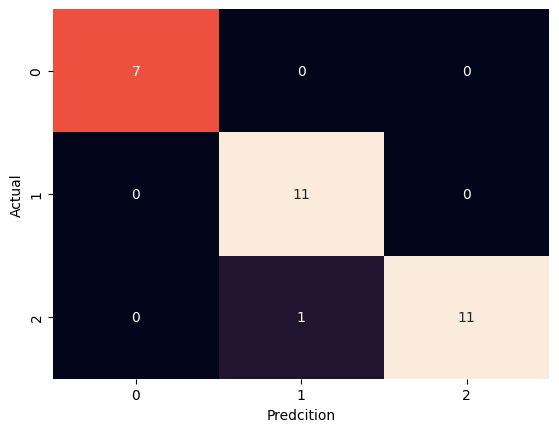

In [35]:
s = sns.heatmap(cfm, annot=True, fmt='d', cbar=False)
s.set(xlabel='Predcition', ylabel='Actual')
plt.show()